# **Project 2 Report**

Nick Alvarez

CS458

## **P2-1. Decision Tree**

**(a) Develop a decision tree based classifier to classify the 3 different types  of Iris (Setosa, Versicolour, and Virginica).**

Discuss how you use 5-fold cross validation to train the classifier here.

**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree. Plot your decision tree.**

Accuracy of five-fold cross validation is  0.9783333333333333
Accuracy of hyperparameter tuning is  0.9666666666666668
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
[[ 0  0 10]
 [ 0  0 10]
 [ 0  0 10]]


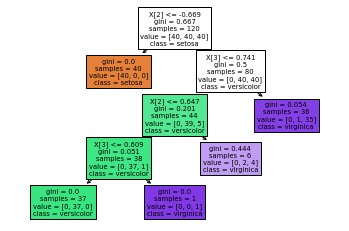

In [8]:
from sklearn import datasets, model_selection, tree, metrics, svm, preprocessing
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

# (a) Develop classifier
iris = datasets.load_iris()
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(iris.data, iris.target)
#tree.plot_tree(clf, filled=True, class_names=iris.target_names)
#plt.show()

# (b) Cross validation
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.1, random_state=0)

avgAccuracy = 0.0
skf = model_selection.StratifiedKFold(n_splits=5)
skf.get_n_splits(iris.data, iris.target)
for train_index, test_index in skf.split(iris.data, iris.target):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    clf = svm.SVC(kernel='linear', C=1, random_state=42)
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=5)
    #print(scores)
    avgAccuracy += np.average(scores)
avgAccuracy /= 5
print("Accuracy of five-fold cross validation is ", avgAccuracy)

max_depth_range = [None, 2, 5, 10]
min_samples_leaf_range = [1, 5, 10]
min_sample_split_range = [2,10, 20]
min_leaf_nodes_range = [None, 5, 10, 20]

param_grid = {"criterion": ['gini'],
              "max_depth": max_depth_range,
              "min_samples_leaf": min_samples_leaf_range,
              "min_samples_split": min_sample_split_range,
              "max_leaf_nodes": min_leaf_nodes_range
              }

grid = model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', refit=True)

clf = make_pipeline(preprocessing.StandardScaler(), grid)
clf.fit(X_train, y_train)
print("Accuracy of hyperparameter tuning is ", grid.best_score_)
print(grid.best_params_)
y_pred = grid.best_estimator_.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
tree.plot_tree(grid.best_estimator_, filled=True, class_names=iris.target_names)
plt.show()

Discuss how you optimize the parameters of your decision tree here.

# **P2-2. Model Overfitting**

**(a) Generate the dataset as in slide 56 in Chapter 3**

In [4]:
# Codes for P2-2(a)
print('Plot your dataset')

Plot your dataset


**(b) Randomly select 10% of the data as test dataset and the remaining 90% of the data as training dataset. Train decision trees by increasing the number of nodes of the decision trees until the training error becomes 0. Plot the training errors and the testing errors under different numbers of nodes and explain the model underfitting and model overfitting.**

In [5]:
# Codes for P2-2(b)
print('Plot the training errors and the testing errors under different numbers of nodes')

Plot the training errors and the testing errors under different numbers of nodes


Explain the model underfitting and model overfitting here.

# **P2-3. Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']. Print the number of documents in the training dataset and the test dataset. Print the number of attributes in the training dataset.**

In [7]:
# Codes for P2-3(a)
print('Print the number of documents in the training dataset and the test dataset. Print the number of attributes in the training dataset.')

Print the number of documents in the training dataset and the test dataset. Print the number of attributes in the training dataset.


**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree.**

In [8]:
# Codes for P2-3(b)
print('Print your classification accuracy, confusion matrix.')

Print your classification accuracy, confusion matrix.


Discuss how you optimize the parameters of your decision tree here.